# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from collections import defaultdict

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Memuat data beverage dengan 5000 baris pertama
data_df = pd.read_csv("Dataset_clustering.csv", nrows=5000)
data_df

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD1682,CUS2891,B2C,Mezzo Mix,Soft Drinks,0.61,4,0.00,2.44,Schleswig-Holstein,2022-07-30
4996,ORD1682,CUS2891,B2C,Granini Apple,Juices,1.64,11,0.00,18.04,Schleswig-Holstein,2022-07-30
4997,ORD1683,CUS8293,B2C,Vittel,Water,0.59,14,0.00,8.26,Bremen,2023-01-29
4998,ORD1683,CUS8293,B2C,Tanqueray,Alcoholic Beverages,35.65,12,0.00,427.80,Bremen,2023-01-29


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan 5 baris pertama dari data_df
data_df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [5]:
# Menampilkan jumlah baris dan kolom dari data_df
data_df.shape

(5000, 11)

In [6]:
# Menampilkan informasi umum dari data_df
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       5000 non-null   object 
 1   Customer_ID    5000 non-null   object 
 2   Customer_Type  5000 non-null   object 
 3   Product        5000 non-null   object 
 4   Category       5000 non-null   object 
 5   Unit_Price     5000 non-null   float64
 6   Quantity       5000 non-null   int64  
 7   Discount       5000 non-null   float64
 8   Total_Price    5000 non-null   float64
 9   Region         5000 non-null   object 
 10  Order_Date     5000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 429.8+ KB


In [7]:
# Cek jumlah missing values dari data_df
missing_values = data_df.isnull().sum()
missing_values

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

In [8]:
# Cek jumlah data duplikat dari data_df
print("Jumlah duplikasi: ", data_df.duplicated().sum())
data_df.duplicated()

Jumlah duplikasi:  0


0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [9]:
# Menghapus kolom yang tidak digunakan
data_df = data_df.drop(columns=['Order_ID','Customer_ID','Order_Date','Region','Product','Customer_Type'])

In [10]:
# Cek kembali apakah sudah terhapus?
data_df.head()

,Category,Unit_Price,Quantity,Discount,Total_Price
0,Water,1.66,53,0.10,79.18
1,Water,1.56,90,0.10,126.36
2,Soft Drinks,1.17,73,0.05,81.14
3,Juices,3.22,59,0.10,170.98
4,Water,0.87,35,0.10,27.40


In [11]:
# Mengelompokkan data yang bersifat kategori dan numerik
numerical_col = data_df.select_dtypes(exclude=[object]).columns.tolist()
categorical_col = data_df.select_dtypes(include=[object]).columns.tolist()

In [12]:
# Menampilkan statistik deskriptif pada kolom kategori
data_df[categorical_col].describe()

,Category
count,5000
unique,4
top,Soft Drinks
freq,1318


In [13]:
# Menampilkan statistik deskriptif pada kolom numerik
data_df[numerical_col].describe()

,Unit_Price,Quantity,Discount,Total_Price
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.767002,22.406800,0.028170,117.713088
std,14.716917,26.438175,0.044174,456.698975
min,0.320000,1.000000,0.000000,0.400000
25%,1.070000,6.000000,0.000000,8.520000
50%,1.840000,11.000000,0.000000,20.975000
75%,3.210000,26.250000,0.050000,66.590000
max,132.090000,100.000000,0.150000,10112.850000


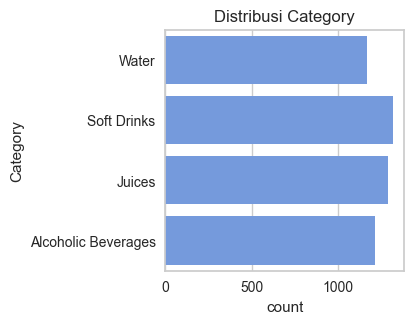

In [14]:
# Menampilkan diagram distribusi data ketegori
plt.figure(figsize=(12,6))
for i, column in enumerate(categorical_col,1):
    plt.subplot(2,4,i)
    sns.countplot(y=data_df[column],color='cornflowerblue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

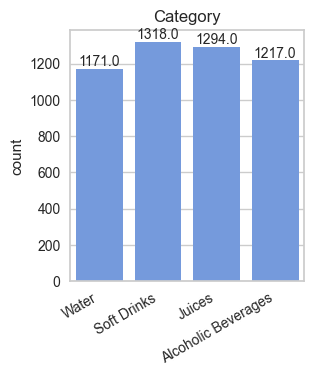

In [15]:
# Menampilkan diagram dari jumlah data kategori
plt.figure(figsize=(12,6))
for i, column in enumerate(categorical_col,1):
    plt.subplot(2,4,i)
    ax = sns.countplot(x=data_df[column],color='cornflowerblue')
    plt.title(f'{column}')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}',
                    (p.get_x()+p.get_width()/2,p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    ax.set_xlabel('')
plt.tight_layout()
plt.xticks(rotation=30,ha='right')
plt.show()

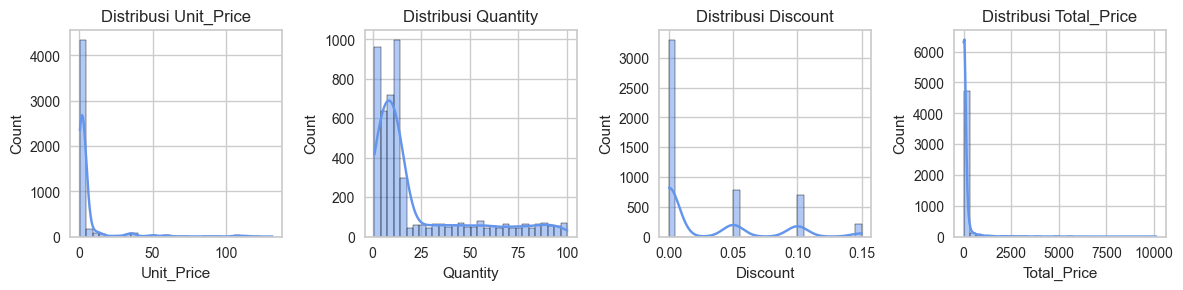

In [16]:
# Menampilkan diagram distribusi data numerik
plt.figure(figsize=(12,8))
for i, column in enumerate(numerical_col,1):
    plt.subplot(3,4,i)
    sns.histplot(data_df[column],bins=30,kde=True,color='cornflowerblue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

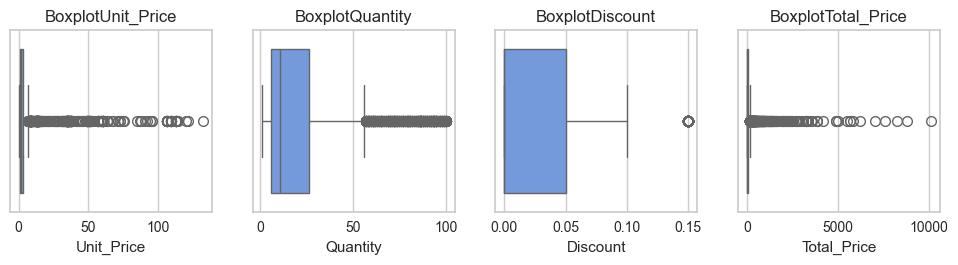

In [17]:
# Boxplot untuk mendekteksi outlier
plt.figure(figsize=(12,8))
for i, column in enumerate(numerical_col,1):
    plt.subplot(3,4,i)
    sns.boxplot(x=data_df[column],color='cornflowerblue')
    plt.title(f'Boxplot{column}')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [18]:
# Mengidentifikasi outliers menggunakan IQR dari data_df
Q1 = data_df[numerical_col].quantile(0.25)
Q3 = data_df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan jumlah outlier per fitur dari data_df
outliers_before = ((data_df[numerical_col]<lower_bound)|(data_df[numerical_col]>upper_bound)).sum()
print("Jumlah outlier sebelum ditangani:\n", outliers_before)

Jumlah outlier sebelum ditangani:
 Unit_Price     591
Quantity       728
Discount       213
Total_Price    660
dtype: int64


In [19]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik dari data_df
condition = ~((data_df[numerical_col] < lower_bound) | (data_df[numerical_col] > upper_bound)).any(axis=1)
data_df = data_df.loc[condition].copy()

# Cek kembali outlier
outliers_after = ((data_df[numerical_col]<lower_bound)|(data_df[numerical_col]>upper_bound)).sum()
print("Jumlah outlier setelah ditangani:\n",outliers_after)

Jumlah outlier setelah ditangani:
 Unit_Price     0
Quantity       0
Discount       0
Total_Price    0
dtype: int64


In [20]:
# Melakukan encoding menggunakan OneHotEncoder
categorical_col = ['Category']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_columns = encoder.fit_transform(data_df[categorical_col])  
ohe_feature_names = encoder.get_feature_names_out(categorical_col)

# Membuat DataFrame dari hasil one-hot encoding 
ohe_df = pd.DataFrame(encoded_columns, columns=ohe_feature_names, index=data_df.index)

# Menggabungkan hasil one-hot encoding dengan DataFrame asli 
data_df = data_df.drop(columns=categorical_col)  
data_df = pd.concat([data_df, ohe_df], axis=1)
data_df


,Unit_Price,Quantity,Discount,Total_Price,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,1.66,53,0.10,79.18,0.0,0.0,0.0,1.0
4,0.87,35,0.10,27.40,0.0,0.0,0.0,1.0
6,2.14,44,0.10,84.74,0.0,1.0,0.0,0.0
7,0.43,13,0.05,5.31,0.0,0.0,0.0,1.0
9,1.38,3,0.05,3.93,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
4994,0.47,13,0.00,6.11,0.0,0.0,0.0,1.0
4995,0.61,4,0.00,2.44,0.0,0.0,1.0,0.0
4996,1.64,11,0.00,18.04,0.0,1.0,0.0,0.0
4997,0.59,14,0.00,8.26,0.0,0.0,0.0,1.0


In [21]:
# Melakukan normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
data_df[numerical_features] = scaler.fit_transform(data_df[numerical_features])
data_df

,Unit_Price,Quantity,Discount,Total_Price,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,0.227891,0.945455,1.0,0.513995,0.0,0.0,0.0,1.0
4,0.093537,0.618182,1.0,0.176160,0.0,0.0,0.0,1.0
6,0.309524,0.781818,1.0,0.550271,0.0,1.0,0.0,0.0
7,0.018707,0.218182,0.5,0.032035,0.0,0.0,0.0,1.0
9,0.180272,0.036364,0.5,0.023031,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
4994,0.025510,0.218182,0.0,0.037255,0.0,0.0,0.0,1.0
4995,0.049320,0.054545,0.0,0.013310,0.0,0.0,1.0,0.0
4996,0.224490,0.181818,0.0,0.115091,0.0,1.0,0.0,0.0
4997,0.045918,0.236364,0.0,0.051282,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

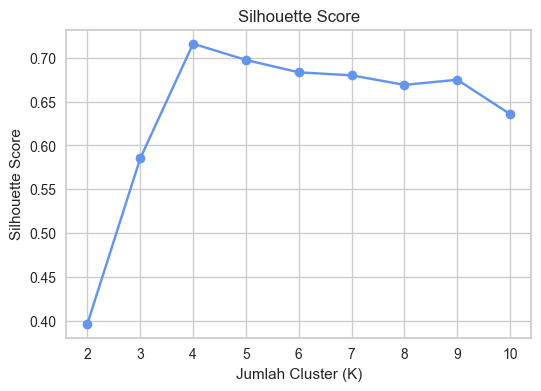

In [22]:
# Pembangunan model K-Means Clustering
silhouette = []

for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_df)
    silhouette.append(silhouette_score(data_df, labels))

# Plot hasilnya
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), silhouette, marker='o', linestyle='-', color='cornflowerblue')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

For n_clusters = 2, the average silhouette_score is: 0.3967
For n_clusters = 3, the average silhouette_score is: 0.5853
For n_clusters = 4, the average silhouette_score is: 0.7161
For n_clusters = 5, the average silhouette_score is: 0.6976
For n_clusters = 6, the average silhouette_score is: 0.6835
For n_clusters = 7, the average silhouette_score is: 0.6800
For n_clusters = 8, the average silhouette_score is: 0.6691
For n_clusters = 9, the average silhouette_score is: 0.6750
For n_clusters = 10, the average silhouette_score is: 0.6357
For n_clusters = 11, the average silhouette_score is: 0.6409
For n_clusters = 12, the average silhouette_score is: 0.5909
For n_clusters = 13, the average silhouette_score is: 0.5828
For n_clusters = 14, the average silhouette_score is: 0.5851
For n_clusters = 15, the average silhouette_score is: 0.5222
For n_clusters = 16, the average silhouette_score is: 0.5370
For n_clusters = 17, the average silhouette_score is: 0.5402
For n_clusters = 18, the average

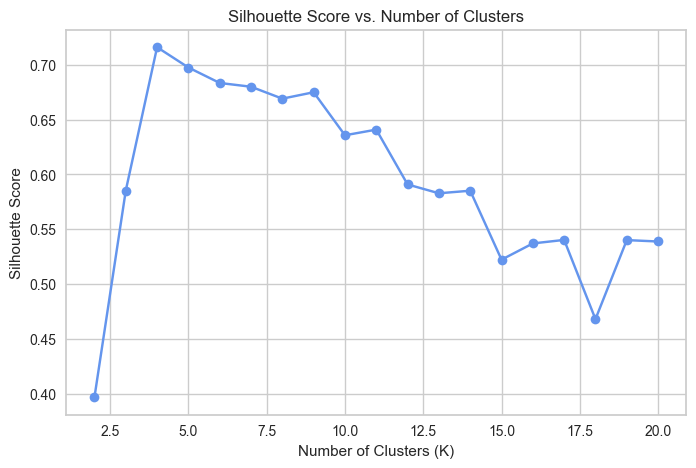

In [23]:
# Mencari jumlah k optimal menggunakan nilai silhouette score
range_n_clusters = list(range(2, 21))
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_df)  
    
    silhouette_avg = silhouette_score(data_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.4f}")

k_optimal = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal Jumlah Cluster: {k_optimal}")

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='cornflowerblue', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [24]:
# Melakukan Feature Selection menggunakan VarianceThreshold
selector = VarianceThreshold(threshold=0.03)
data_selected = selector.fit_transform(data_df)
kmeans = KMeans(n_clusters = k_optimal, random_state=42, n_init=10)
data_df['Cluster'] = kmeans.fit_predict(data_selected)

# Menghitung Silhouette Score sebelum dan sesudah feature selection
sil_score_before = silhouette_score(data_df.drop(columns=['Cluster']), data_df['Cluster'])
sil_score_after = silhouette_score(data_selected, data_df['Cluster'])
print(f'Silhouette Score Sebelum Feature Selection: {sil_score_before:.4f}')
print(f'Silhouette Score Setelah Feature Selection: {sil_score_after:.4f}')

Silhouette Score Sebelum Feature Selection: 0.7161
Silhouette Score Setelah Feature Selection: 0.7337


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

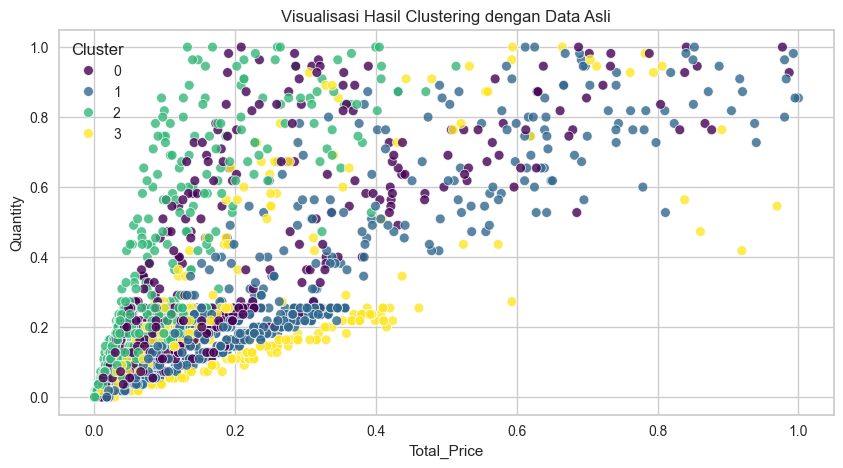

In [25]:
# Menampilkan visualisasi hasil clustering dari data asli
plt.figure(figsize=(10,5))
sns.scatterplot(
    x = data_df['Total_Price'],# Bisa di ganti fitur lain
    y = data_df['Quantity'],# Bisa di ganti fitur lain
    hue = data_df['Cluster'],
    palette = 'viridis',
    s = 50, alpha = 0.8
)
plt.title('Visualisasi Hasil Clustering dengan Data Asli')
plt.xlabel('Total_Price')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

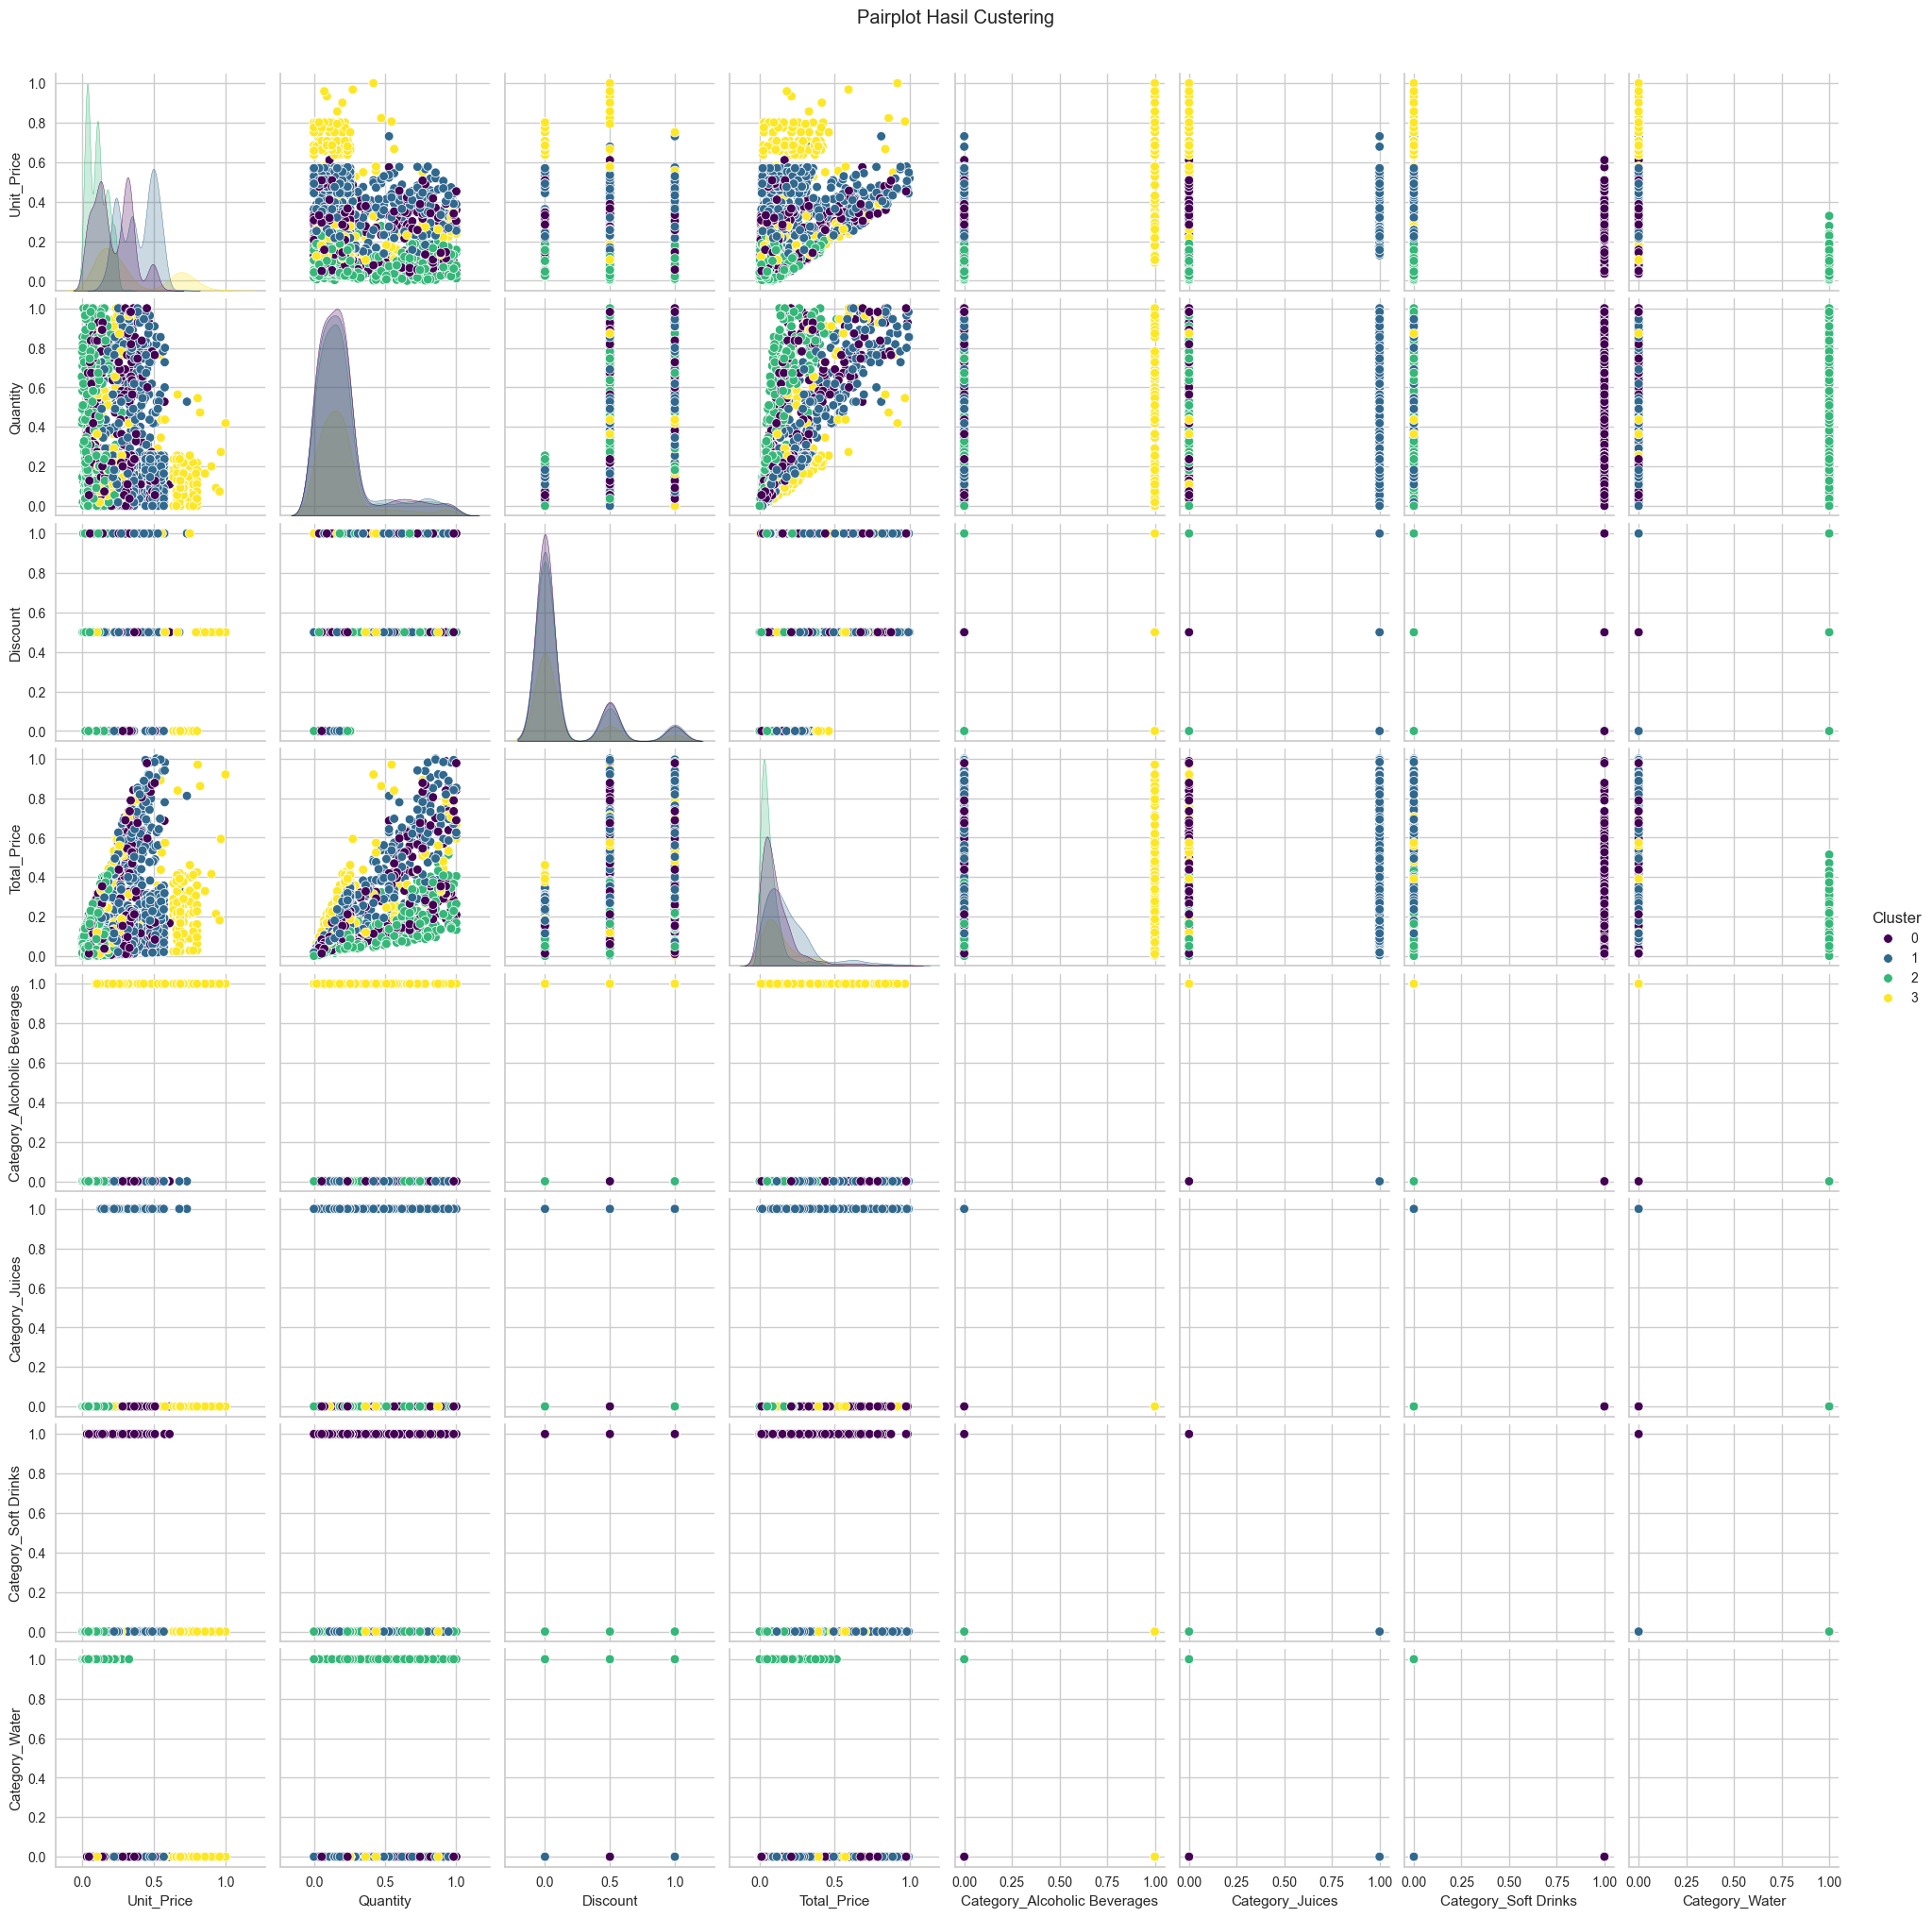

In [26]:
# Menampilkan visualisasi hasil clustering secara keseluruhan
sns.pairplot(data_df, hue='Cluster', palette = 'viridis')
plt.suptitle('Pairplot Hasil Custering', y = 1.02)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [27]:
# Cek apakah hasil label clustering sudah tergabung dalam data frame
data_df

,Unit_Price,Quantity,Discount,Total_Price,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water,Cluster
0,0.227891,0.945455,1.0,0.513995,0.0,0.0,0.0,1.0,2
4,0.093537,0.618182,1.0,0.176160,0.0,0.0,0.0,1.0,2
6,0.309524,0.781818,1.0,0.550271,0.0,1.0,0.0,0.0,1
7,0.018707,0.218182,0.5,0.032035,0.0,0.0,0.0,1.0,2
9,0.180272,0.036364,0.5,0.023031,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...
4994,0.025510,0.218182,0.0,0.037255,0.0,0.0,0.0,1.0,2
4995,0.049320,0.054545,0.0,0.013310,0.0,0.0,1.0,0.0,0
4996,0.224490,0.181818,0.0,0.115091,0.0,1.0,0.0,0.0,1
4997,0.045918,0.236364,0.0,0.051282,0.0,0.0,0.0,1.0,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [28]:
# Invers tranform untuk data yang dinormalisasi
data_df[numerical_features] = scaler.inverse_transform(data_df[numerical_features])
data_df

,Unit_Price,Quantity,Discount,Total_Price,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water,Cluster
0,1.66,53.0,0.10,79.18,0.0,0.0,0.0,1.0,2
4,0.87,35.0,0.10,27.40,0.0,0.0,0.0,1.0,2
6,2.14,44.0,0.10,84.74,0.0,1.0,0.0,0.0,1
7,0.43,13.0,0.05,5.31,0.0,0.0,0.0,1.0,2
9,1.38,3.0,0.05,3.93,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...
4994,0.47,13.0,0.00,6.11,0.0,0.0,0.0,1.0,2
4995,0.61,4.0,0.00,2.44,0.0,0.0,1.0,0.0,0
4996,1.64,11.0,0.00,18.04,0.0,1.0,0.0,0.0,1
4997,0.59,14.0,0.00,8.26,0.0,0.0,0.0,1.0,2


In [29]:
# Invers trasform data kategori asli dari OneHot encoding
data_df['Category'] = encoder.inverse_transform(data_df[ohe_feature_names]).ravel()
data_df = data_df.drop(columns=ohe_feature_names)
data_df

,Unit_Price,Quantity,Discount,Total_Price,Cluster,Category
0,1.66,53.0,0.10,79.18,2,Water
4,0.87,35.0,0.10,27.40,2,Water
6,2.14,44.0,0.10,84.74,1,Juices
7,0.43,13.0,0.05,5.31,2,Water
9,1.38,3.0,0.05,3.93,2,Water
...,...,...,...,...,...,...
4994,0.47,13.0,0.00,6.11,2,Water
4995,0.61,4.0,0.00,2.44,0,Soft Drinks
4996,1.64,11.0,0.00,18.04,1,Juices
4997,0.59,14.0,0.00,8.26,2,Water


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [30]:
# Mendefinisikan metode agregasi untuk fitur numerik 
agg_methods = {
    col: ['min', 'max', 'mean']
    for col in data_df.select_dtypes(exclude=['object']).columns if col != 'Cluster'
}

# Mendefinisikan metode agregasi untuk fitur kategori
agg_methods.update({
    col: lambda x: x.mode().iloc[0] if not x.mode().empty else None
    for col in data_df.select_dtypes(include=['object']).columns
})

# Agregasi berdasarkan cluster
cluster_summary = data_df.groupby('Cluster').agg(agg_methods)

# Pastikan hasil numerik dalam bentuk tuple
for col in data_df.select_dtypes(exclude=['object']).columns:
    if col in cluster_summary.columns:
        cluster_summary[col] = list(zip(cluster_summary[col]['min'], 
                                        cluster_summary[col]['max'], 
                                        cluster_summary[col]['mean']))

# Format hasil 
def format_summary(cluster_summary):
    for cluster, data in cluster_summary.iterrows():
        print(f"\n🍹 Cluster {cluster}:")
        seen_cols = set()  # Untuk menghindari duplikasi
        for col in data.index:
            col_name = col[0] if isinstance(col, tuple) else col  # Tangani multi-index
            if col_name in seen_cols:
                continue  # Lewati jika sudah ditampilkan
            seen_cols.add(col_name)
            
            if isinstance(data[col], tuple):  # Fitur numerik
                print(f"  - {col_name}: min:{data[col][0]}, max:{data[col][1]}, mean:{data[col][2]:.2f}")
            else:  # Fitur kategorikal
                print(f"  - {col_name}: kategori terbanyak adalah {data[col]}")

# Cetak hasil per klaster
format_summary(cluster_summary)



🍹 Cluster 0:
  - Unit_Price: min:0.53, max:3.91, mean:1.61
  - Quantity: min:1.0, max:56.0, mean:12.30
  - Discount: min:0.0, max:0.1, mean:0.01
  - Total_Price: min:0.53, max:151.66, mean:19.02
  - Category: kategori terbanyak adalah Soft Drinks

🍹 Cluster 1:
  - Unit_Price: min:1.08, max:4.62, mean:2.63
  - Quantity: min:1.0, max:56.0, mean:12.53
  - Discount: min:0.0, max:0.1, mean:0.01
  - Total_Price: min:1.24, max:153.67, mean:30.88
  - Category: kategori terbanyak adalah Juices

🍹 Cluster 2:
  - Unit_Price: min:0.32, max:2.25, mean:0.94
  - Quantity: min:1.0, max:56.0, mean:12.45
  - Discount: min:0.0, max:0.1, mean:0.01
  - Total_Price: min:0.4, max:79.18, mean:10.85
  - Category: kategori terbanyak adalah Water

🍹 Cluster 3:
  - Unit_Price: min:0.86, max:6.2, mean:2.32
  - Quantity: min:1.0, max:56.0, mean:11.85
  - Discount: min:0.0, max:0.1, mean:0.01
  - Total_Price: min:0.9299999999999999, max:149.02, mean:25.00
  - Category: kategori terbanyak adalah Alcoholic Beverages


## 📊Analisis Karakteristik Hasil Clustering Menggunakan K-Means Berdasarkan Data Beverage
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

### 🍹 Cluster 0:
##### Karakteristik:
- Rata-rata harga satuan : 1,61
- Rata-rata jumlah pembelian per-unit: 12,30
- Rata-rata diskon yang diberikan: 0,01
- Rata-rata jumlah total pembelian: 19,02 ribu
- Rentang harga satuan: 0,53-3,91
- Rentang jumlah pembelian per-unit: 1-56 pembelian
- Rentang diskon yang diberikan:  0-10%
- Rentang jumlah total pembelian: 0,53-151,66 ribu
- Jenis minuman dengan pembelian terbanyak adalah Soft Drinks
##### Interpretasi:
Cluster ini terdiri dari pelanggan yang sering membeli Soft Drinks dengan harga relatif murah (rata-rata 1,61) dan total pembelian yang cukup besar (rata-rata 19,02 ribu). Jumlah pembelian per unit cukup tinggi (rata-rata 12,30 unit)menunjukkan bahwa pelanggan dalam cluster ini cenderung membeli dalam jumlah besar. Diskon yang diberikan sangat kecil (0,01), menandakan bahwa produk dalam kategori ini tidak terlalu bergantung pada promo untuk menarik pembeli.
Pelanggan dalam cluster ini kemungkinan besar adalah mereka yang membeli soft drinks secara rutin dalam jumlah besar, seperti pemilik warung atau konsumen rumah tangga yang suka menyetok minuman.

### 🍹Cluster 1:
##### Karakteristik:
- Rata-rata harga satuan : 2,63
- Rata-rata jumlah pembelian per-unit: 12,53
- Rata-rata diskon yang diberikan: 0,01
- Rata-rata jumlah total pembelian: 30,88
- Rentang harga satuan: 1,08-4,62
- Rentang jumlah pembelian per-unit: 1-56 pembelian
- Rentang diskon yang diberikan:  0-10%
- Rentang jumlah total pembelian: 1,24-153,67 ribu
- Jenis minuman dengan pembelian terbanyak adalah Juices
##### Interpretasi:
Cluster ini lebih didominasi oleh pembeli Juices, dengan rata-rata harga satuan lebih tinggi (2,63) dibanding Cluster 0. Total pembelian per transaksi juga cukup besar (30,88 ribu), menunjukkan bahwa pelanggan dalam cluster ini memiliki daya beli lebih tinggi. Rentang harga yang lebih luas (1,08 - 4,62) menunjukkan adanya variasi jenis jus yang dibeli, mulai dari jus ekonomis hingga premium.
Pelanggan dalam cluster ini bisa jadi terdiri dari mereka yang lebih memilih minuman sehat dan tidak keberatan membayar lebih untuk mendapatkan produk berkualitas. Kemungkinan besar termasuk pembeli individu yang sadar akan kesehatan atau pemilik kafe yang membutuhkan stok jus segar.

### 🍹Cluster 2:
##### Karakteristik:
- Rata-rata harga satuan : 0,94
- Rata-rata jumlah pembelian per-unit: 12,45
- Rata-rata diskon yang diberikan: 0,01
- Rata-rata jumlah total pembelian: 10,85 ribu
- Rentang harga satuan: 0,32-2,25
- Rentang jumlah pembelian per-unit: 1-56 pembelian
- Rentang diskon yang diberikan:  0-10%
- Rentang jumlah total pembelian: 0,4-79,18 ribu
- Jenis minuman dengan pembelian terbanyak adalah Water
##### Interpretasi:
Cluster ini memiliki rata-rata harga satuan yang paling rendah (0,94), dengan total pembelian juga paling kecil (10,85 ribu). Produk yang paling sering dibeli adalah Water, menunjukkan bahwa pelanggan dalam kelompok ini cenderung memilih minuman dengan harga terjangkau dan memiliki kebutuhan dasar seperti air minum.
Karakteristik ini bisa mencerminkan pelanggan yang lebih sensitif terhadap harga dan mungkin lebih sering membeli produk dalam jumlah kecil dibanding kelompok lain. Ini bisa mencakup konsumen rumah tangga dengan anggaran terbatas atau pelanggan yang hanya membeli air mineral untuk kebutuhan sehari-hari.

### 🍹Cluster 3:
##### Karakteristik:
- Rata-rata harga satuan : 2,32
- Rata-rata jumlah pembelian per-unit: 22,85
- Rata-rata diskon yang diberikan: 0,01
- Rata-rata jumlah total pembelian: 25,00 ribu
- Rentang harga satuan: 0,86-6,2
- Rentang jumlah pembelian per-unit: 1-56 pembelian
- Rentang diskon yang diberikan:  0-10%
- Rentang jumlah total pembelian: 0,9299 - 149,02 ribu
- Jenis minuman dengan pembelian terbanyak adalah Alcoholic Beverages
##### Interpretasi:
Cluster ini terdiri dari pelanggan yang membeli Alcoholic Beverages, dengan rata-rata harga per unit cukup tinggi (2,32) dan jumlah pembelian per transaksi yang jauh lebih tinggi dibanding cluster lain (22,85 unit per transaksi). Hal ini menunjukkan bahwa pelanggan dalam cluster ini mungkin membeli dalam jumlah besar sekaligus, yang bisa mengindikasikan pembelian untuk bisnis (seperti bar, restoran, atau toko retail).
Dengan rentang harga yang cukup luas (0,86 - 6,2), cluster ini mencakup pelanggan yang membeli berbagai jenis minuman beralkohol, dari produk murah hingga premium. Kemungkinan besar, pelanggan dalam kelompok ini termasuk pengusaha atau pemilik usaha F&B yang memerlukan stok alkohol dalam jumlah besar.


### Ada beberapa pola menarik yang bisa dimanfaatkan:
1. Strategi diskon:
    - Cluster 0 & 2 (Soft Drinks & Water) sensitif terhadap harga jadi bisa diberikan promo bundling untuk meningkatkan loyalitas pelanggan.
    - Cluster 1 & 3 (Juices & Alcoholic Beverages) lebih cenderung memilih produk premium → Bisa diberikan penawaran eksklusif atau program loyalitas untuk meningkatkan retensi pelanggan.
2. Penyesuaian stok dan ketersediaan produk:
    - Jika bisnis ingin meningkatkan penjualan produk dengan margin lebih tinggi (Juices & Alcoholic Beverages), stok dan variasi produk dalam kategori ini bisa diperbanyak.
3. Strategi pemasaran:
    - Cluster 2 (Water) mungkin bisa disasar dengan iklan berbasis kebutuhan pokok (misalnya, "air sehat untuk keluarga").
    - Cluster 3 (Alcoholic Beverages) bisa difokuskan pada segmen bisnis seperti restoran dan bar, dengan paket khusus untuk pelanggan grosir.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [31]:
data_df.to_csv('Dataset_inisiasi.csv')
print("Proses selesai, data telah disimpan dengan nama 'Dataset_inisiasi.csv'")

Proses selesai, data telah disimpan dengan nama 'Dataset_inisiasi.csv'
